# Projeto 2 - Ciência dos dados

#### Nomes: Pedro Henrique Britto Aragão Andrade, Letícia Teles Machado, Thiago Shiguero Kawahara

In [1]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Abrindo o dataset

dadoscru= pd.read_csv("chocolate.csv")
dadoscru

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [3]:
# Filtrando as colunas

dados_= dadoscru.iloc[:, [2, 3, 5, 7, 8, 9, 11, 12, 13, 17, 18]]
dados_

,company,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,first_taste,second_taste
0,5150,U.S.A,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,cocoa,blackberry
1,5150,U.S.A,Dominican republic,76.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,cocoa,vegetal
2,5150,U.S.A,Tanzania,76.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,rich cocoa,fatty
3,A. Morin,France,Peru,63.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,fruity,melon
4,A. Morin,France,Bolivia,70.0,3.50,4,have_cocoa_butter,have_not_vanila,have_lecithin,vegetal,nutty
...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,Blend,80.0,2.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,waxy,cloying
2220,Zotter,Austria,Colombia,75.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,strong nutty,marshmallow
2221,Zotter,Austria,Belize,72.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,muted,roasty
2222,Zotter,Austria,Congo,70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,fatty,mild nuts


In [4]:
# Renomenando as colunas

dados= dados_.rename(columns= {"company": "cia", "company_location": "local_cia", "country_of_bean_origin": "país_grão",
                      "cocoa_percent": "%cacau", "counts_of_ingredients": "num_ingr", "cocoa_butter": "manteiga_cacau",
                      "vanilla": "baunilha", "lecithin": "lecitina", "first_taste": "1_sabor", "second_taste": "2_sabor"})

In [5]:
# Renomeando as linhas

dados.loc[dados.manteiga_cacau== "have_cocoa_butter", "manteiga_cacau"]= "yes"
dados.loc[dados.manteiga_cacau== "have_not_cocoa_butter", "manteiga_cacau"]= "no"

dados.loc[dados.baunilha== "have_not_vanila", "baunilha"]= "no"
dados.loc[dados.baunilha== "have_vanila", "baunilha"]= "yes"

dados.loc[dados.lecitina== "have_not_lecithin", "lecitina"]= "no"
dados.loc[dados.lecitina== "have_lecithin", "lecitina"]= "yes"

In [6]:
dados

,cia,local_cia,país_grão,%cacau,rating,num_ingr,manteiga_cacau,baunilha,lecitina,1_sabor,2_sabor
0,5150,U.S.A,Madagascar,76.0,3.75,3,yes,no,no,cocoa,blackberry
1,5150,U.S.A,Dominican republic,76.0,3.50,3,yes,no,no,cocoa,vegetal
2,5150,U.S.A,Tanzania,76.0,3.25,3,yes,no,no,rich cocoa,fatty
3,A. Morin,France,Peru,63.0,3.75,4,yes,no,yes,fruity,melon
4,A. Morin,France,Bolivia,70.0,3.50,4,yes,no,yes,vegetal,nutty
...,...,...,...,...,...,...,...,...,...,...,...
2219,Zotter,Austria,Blend,80.0,2.75,4,yes,no,no,waxy,cloying
2220,Zotter,Austria,Colombia,75.0,3.75,3,yes,no,no,strong nutty,marshmallow
2221,Zotter,Austria,Belize,72.0,3.50,3,yes,no,no,muted,roasty
2222,Zotter,Austria,Congo,70.0,3.25,3,yes,no,no,fatty,mild nuts


1º Coluna (cia)- Companhia da barra de chocolate $\Rightarrow$ qualitativa

2º Coluna (local_cia)- Localização da companhia $\Rightarrow$ qualitativa

3º Coluna (país_grão)- País de origem do grão $\Rightarrow$ qualitativa

4º Coluna (%cacau)- Porcentagem de cacau $\Rightarrow$ quantitativa

5º Coluna (rating)- Avaliação de 0 a 4 $\Rightarrow$ qualitativa ordinal

6º Coluna (num_ingr)- Número de ingredientes $\Rightarrow$ quantitativo

7º Coluna (manteiga_cacau)- Se possui manteiga de cacau (yes/no) $\Rightarrow$ qualitativa

8º Coluna (baunilha)- Se possui baunilha (yes/no) $\Rightarrow$ qualitativa

9º Coluna (lecitina)- Se possui leticina (yes/no) $\Rightarrow$ qualitativa

10º Coluna (1_sabor)- Primeiro sabor $\Rightarrow$ qualitativa

11º Coluna (2_sabor)- Segundo sabor $\Rightarrow$ qualitativa

In [175]:
round(pd.crosstab(dados.cia, dados.rating, normalize="index", margins= True)*100, 4)

rating,1.00,1.50,1.75,2.00,2.25,2.50,2.60,2.75,3.00,3.25,3.50,3.75,4.00
cia,,,,,,,,,,,,,
5150,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,33.3333,33.3333,33.3333,0.0000
A. Morin,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,16.0000,12.0000,12.0000,28.0000,20.0000,12.0000
AMMA,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,20.0000,0.0000,20.0000,0.0000,40.0000,20.0000
Acalli,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,25.0000,25.0000,50.0000,0.0000
Adi aka Fijiana (Easy In Ltd),0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,25.0000,0.0000,25.0000,50.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
hexx,0.000,0.0000,0.000,0.000,10.0000,10.0000,0.000,20.0000,30.0000,20.0000,10.0000,0.0000,0.0000
iQ Chocolate,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,50.0000,50.0000,0.0000,0.0000,0.0000,0.0000
organicfair,0.000,0.0000,0.000,0.000,0.0000,0.0000,0.000,50.0000,50.0000,0.0000,0.0000,0.0000,0.0000


In [169]:
# Criando um dicionário com o nome de cada empresa e sua respectiva média de Rating 

dicionario= {}
for i in dados.loc[:,"cia"]:
    if i not in dicionario:
        dicionario[i]= round(np.mean(dados.loc[dados.cia== i, "rating"]), 2)

In [10]:
# Tabela que relaciona a companhia com o intervalo que a sua média de rating se encaixa

c= []
d= []

for i in dicionario.items():
    c.append(i[0])
    if i[1] >= 1 and i[1] < 1.5:
        d.append("1 - 1.5")  
        
    elif i[1] >= 1.5 and i[1] < 2:
        d.append("1.5 - 2")
        
    elif i[1] >= 2 and i[1] < 2.5:
        d.append("2 - 2.5")
        
    elif i[1] >= 2.5 and i[1] < 3:
        d.append("2.5 - 3")
        
    elif i[1] >= 3 and i[1] < 3.5:
        d.append("3 - 3.5")
        
    elif i[1] >= 3.5 and i[1] <= 4:
        d.append("3.5 - 4")
        
data = {'cia':  c, 'intervalo': d,
        }

novo = pd.DataFrame(data, columns = ['cia','intervalo'])

novo["intervalo"] = novo["intervalo"].astype("category")
novo['intervalo'].cat.categories
novo["intervalo"] = pd.Categorical(novo.intervalo,['1 - 1.5', '2 - 2.5', '2.5 - 3'
                                                   , '3 - 3.5', '3.5 - 4'], ordered=True)
novo= novo.sort_values("intervalo", ascending= False)
novo

,cia,intervalo
0,5150,3.5 - 4
78,Cacao Sampaka,3.5 - 4
315,Meybol,3.5 - 4
162,Eclat (Fruition),3.5 - 4
314,Metropolitan,3.5 - 4
...,...,...
253,Ki' Xocolatl,2 - 2.5
301,Marsatta,2 - 2.5
286,Majani,2 - 2.5
415,Shark's,2 - 2.5


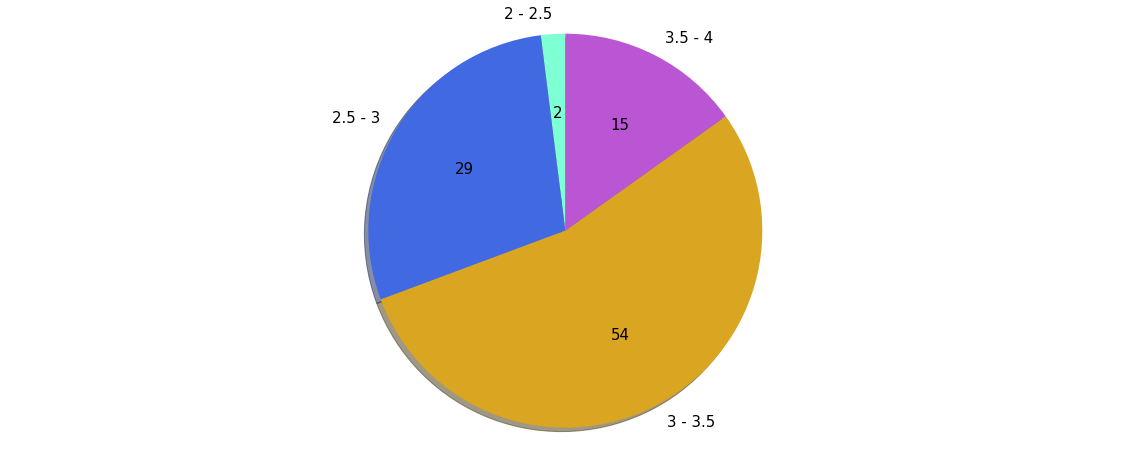

In [167]:
# Plotando um gráfico de pizza que apresenta a porcentagem de ocorrências de cada intervalo

a= (novo.sort_values("intervalo").intervalo.value_counts(normalize= True)*100).round(2)

labels = ['2 - 2.5', '2.5 - 3', '3 - 3.5', '3.5 - 4']
titulos = [a[1], a[2], a[3], a[4]]
cores = ['#7FFFD4', '#4169E1', '#DAA520', '#BA55D3']
total = sum(titulos)

plt.figure(figsize=(20, 8))

plt.pie(titulos, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)


# O [1] muda o tamanho da fonte externa. O [2] muda o tamanho da fonte interna
plt.rcParams['xtick.labelsize'] = 15  #[1]
plt.rcParams.update({'font.size': 15}) #[2]

plt.axis('equal') 
plt.show()